# Predicting House Prices with Linear Regression

# Project Overview

The real estate market is highly dynamic, with house prices influenced by multiple factors such as location, size, number of rooms, and available amenities.
Accurately predicting house prices is valuable for buyers, sellers, realtors, and financial institutions, as it supports better decision-making, investment planning, and market analysis.

This project uses Linear Regression, a fundamental machine learning algorithm, to build a model that estimates the price of a house based on various property features.

By applying data preprocessing, model training, and evaluation, we aim to demonstrate how machine learning can be used to create data-driven pricing strategies.

# Aim

To develop a predictive model that can accurately estimate the selling price of a house using relevant housing features such as area, number of bedrooms, bathrooms, parking availability, and furnishing status.

# Objectives

Data Acquisition & Understanding:
Obtain a dataset containing housing attributes and explore its structure and contents.

Data Cleaning & Preprocessing:
Handle missing values, fix inconsistencies, and transform categorical data into numerical form suitable for regression analysis.

Feature Selection:
Identify which variables (e.g., area, stories, air conditioning) most influence house price.

Model Building:
Train a Linear Regression model using Scikit-learn to predict house prices.

Model Evaluation:
Assess performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).

Visualization & Insights:
Create plots to compare predicted vs. actual values and interpret the importance of each feature.

# Significance of the Project

Helps in understanding the key factors that affect property prices.

Demonstrates data cleaning, feature engineering, and predictive modeling skills.

Builds foundational knowledge for machine learning applications in the real estate domain.

Prepares for more advanced predictive models such as Multiple Regression, Random Forests, and Gradient Boosting.

# Data Loading & Inspection

In [138]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [139]:
# Load dataset
housing = pd.read_csv(r"C:\Users\shadrach\Downloads\Housing2.csv")

# Display first 5 rows
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [140]:

print("Dataset Shape:", housing.shape)




Dataset Shape: (545, 13)


In [141]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [142]:
housing.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [161]:
# Creating yes/no cleaning
yes_no_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in yes_no_cols:
    housing[col] = housing[col].str.strip().str.capitalize()
    housing.fillna({
    'mainroad':'No',
    'guestroom':'No',
    'basement':'No',
    'hotwaterheating':'No',
    'airconditioning':'No',
    'prefarea':'No',
    'furnishingstatus':'Unfurnished'
}, inplace=True)



In [162]:
print("Duplicates:", housing.duplicated().sum())


Duplicates: 0


In [146]:
# Clean all text data properly
for col in housing.columns:
    housing[col] = housing[col].astype(str).str.strip()

num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_cols = [col for col in housing.columns if col not in num_cols]

for col in num_cols:
    housing[col] = pd.to_numeric(housing[col], errors='coerce')
    housing[col].fillna(housing[col].median(), inplace=True)

for col in cat_cols:
    housing[col] = housing[col].fillna(housing[col].mode()[0])

def clean_yes_no(val):
    v = str(val).strip().lower()
    if v in ['yes', 'y', 'ye', 'yea', '1']:
        return 'Yes'
    elif v in ['no', 'n', '0']:
        return 'No'
    return val

for col in cat_cols:
    housing[col] = housing[col].apply(clean_yes_no)




In [147]:
##Standardize Text Case
for col in cat_cols:
    housing[col] = housing[col].str.lower().str.strip()

In [148]:
##Fix Invalid Category Entries
housing['furnishingstatus'] = housing['furnishingstatus'].replace({
    'full': 'furnished',
    'furnisd': 'furnished',
    'semi': 'semi-furnished',
    'none': 'unfurnished',
    'unknown': 'unfurnished'
})

In [149]:
housing['parking'] = pd.to_numeric(housing['parking'], errors='coerce')


In [163]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,Yes,No,No,No,Yes,2,Yes,furnished
1,12250000,8960,4,4,4,Yes,No,No,No,Yes,3,No,furnished
2,12250000,9960,3,2,2,Yes,No,Yes,No,No,2,Yes,semi-furnished
3,12215000,7500,4,2,2,Yes,No,Yes,No,Yes,3,Yes,furnished
4,11410000,7420,4,1,2,Yes,Yes,Yes,No,Yes,2,No,furnished


# Exploratory Data Analysis (EDA)

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,Yes,No,No,No,Yes,2,Yes,furnished
1,12250000,8960,4,4,4,Yes,No,No,No,Yes,3,No,furnished
2,12250000,9960,3,2,2,Yes,No,Yes,No,No,2,Yes,semi-furnished
3,12215000,7500,4,2,2,Yes,No,Yes,No,Yes,3,Yes,furnished
4,11410000,7420,4,1,2,Yes,Yes,Yes,No,Yes,2,No,furnished


In [152]:
##Univariate Analysis

In [153]:
##(a)Numerical Variables

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['price','area','bedrooms','bathrooms','stories','parking']



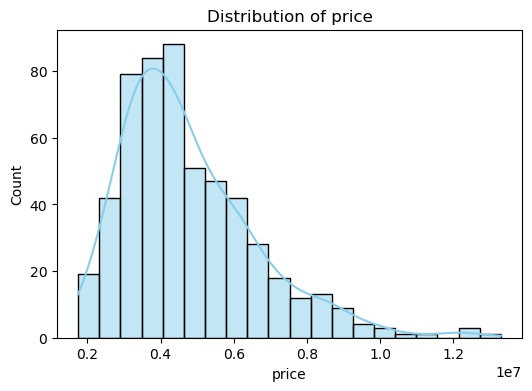

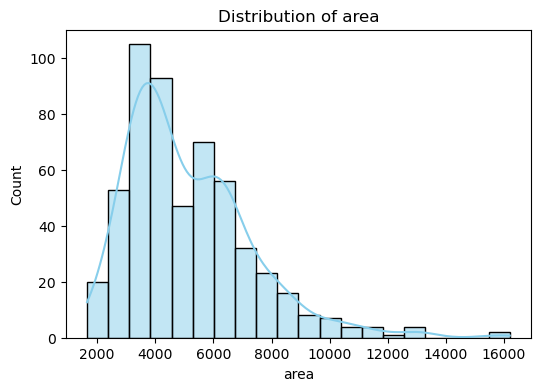

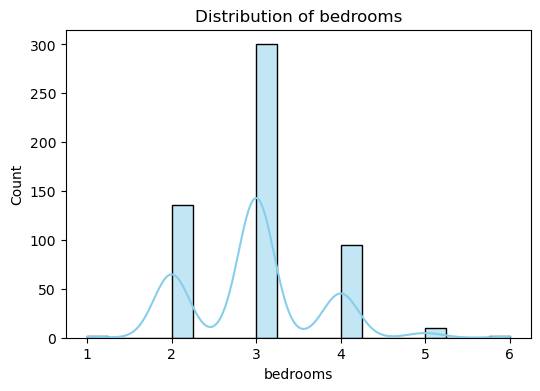

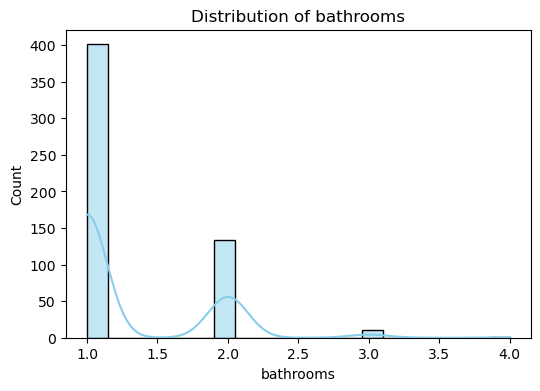

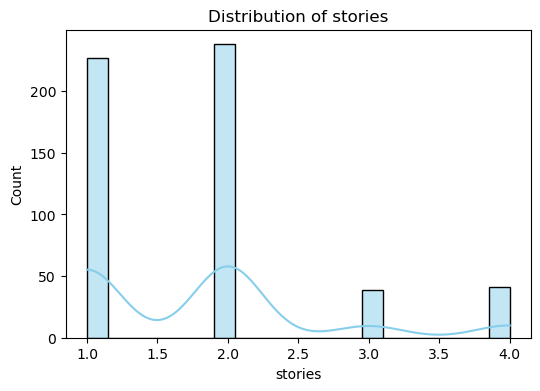

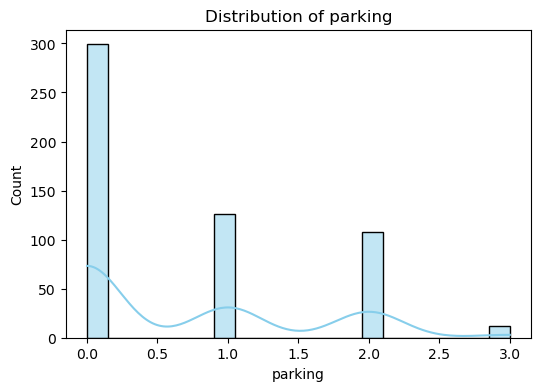

In [166]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(housing[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [156]:
##Categorical variable

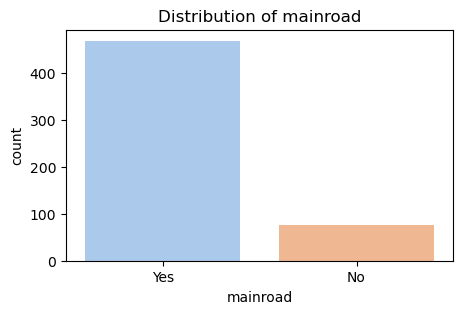

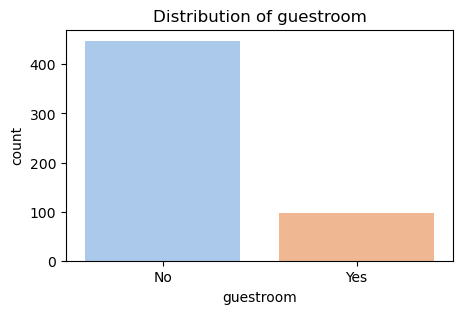

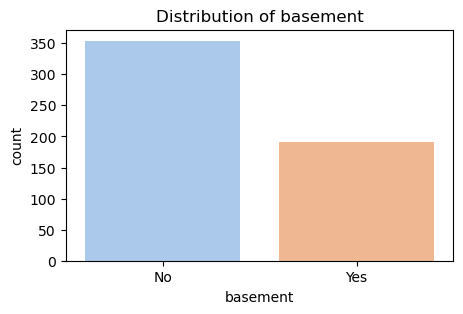

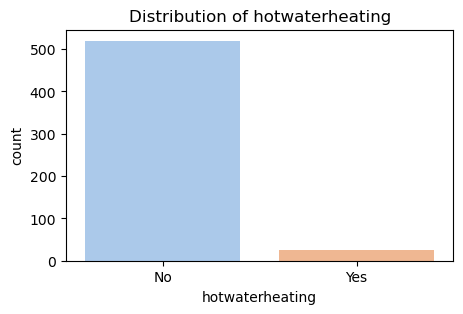

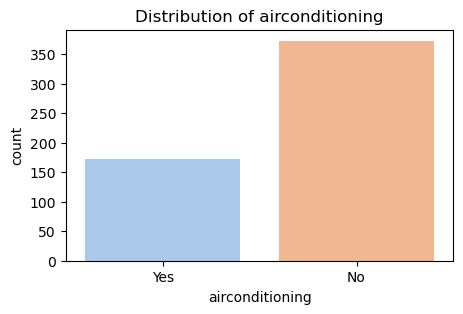

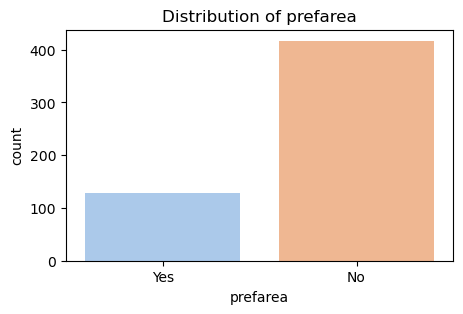

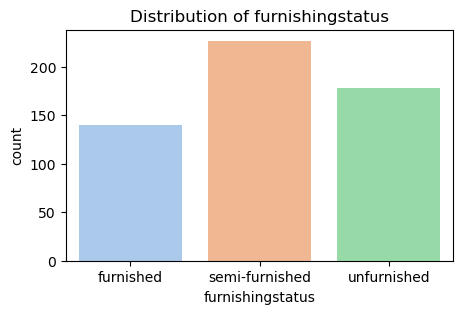

In [167]:
cat_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=housing, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.show()


In [158]:
##Bivarient Analysis

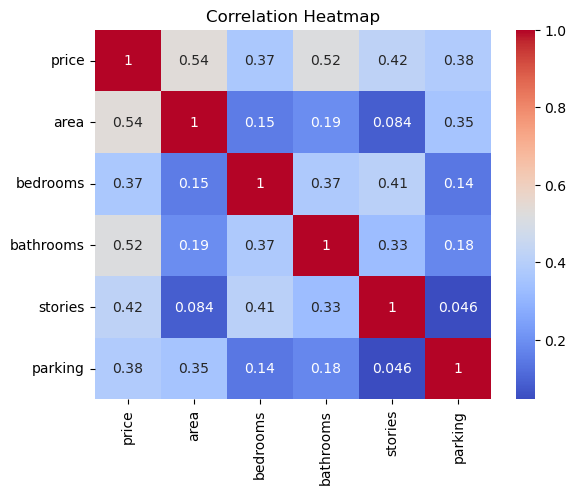

In [169]:
sns.heatmap(housing.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Trivalent Analysis

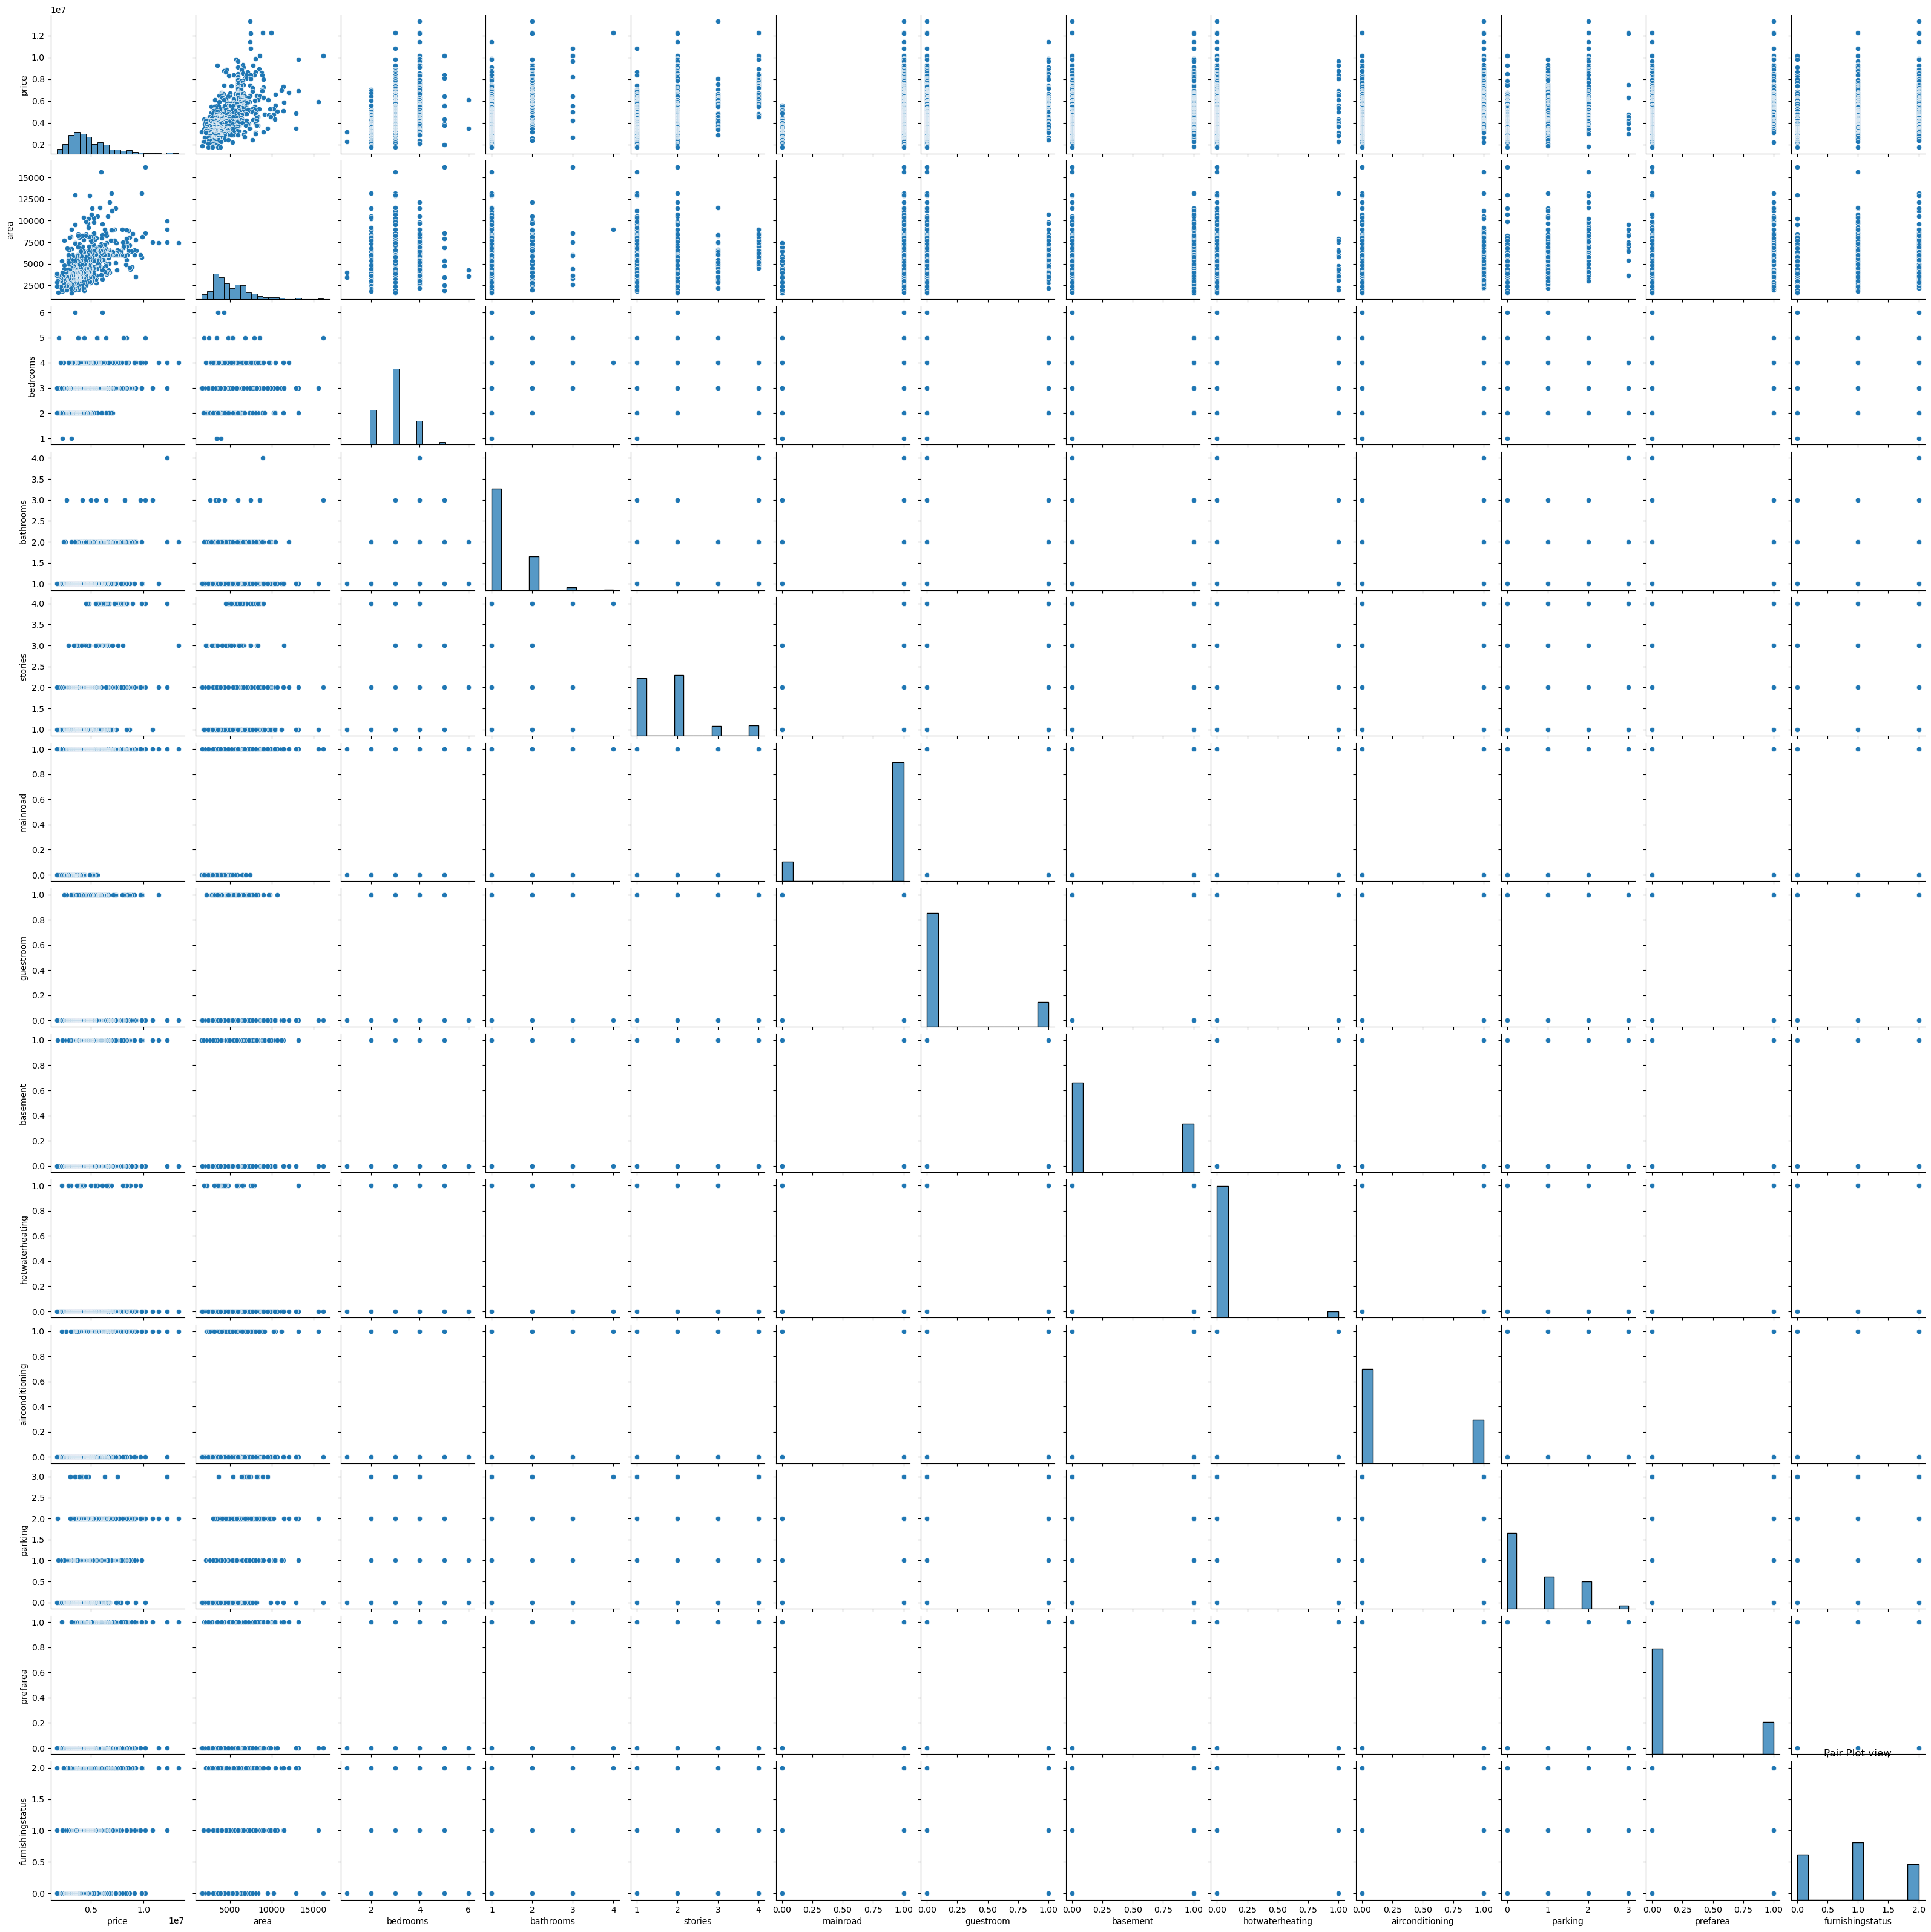

In [181]:
sns.pairplot(housing)
plt.title('Pair Plot view')
plt.show()

In [170]:
##Data prepossing
# Fill missing categorical values
cat_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in cat_cols:
    housing[col].fillna(housing[col].mode()[0], inplace=True)

# Fill missing numerical values (if any)
num_cols = ['area','bedrooms','bathrooms','stories','parking','price']
for col in num_cols:
    housing[col].fillna(housing[col].median(), inplace=True)


In [171]:
##Encode Categorical Variables
yes_no_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in yes_no_cols:
    housing[col] = housing[col].map({'Yes':1, 'No':0, 'yes':1, 'no':0, 'Y':1, 'N':0})


In [172]:
##Multi-Class Feature
furnish_map = {'unfurnished':0, 'semi-furnished':1, 'furnished':2, 'FULL':3}
housing['furnishingstatus'] = housing['furnishingstatus'].map(furnish_map)


In [174]:
##Feature and Target Separation
X = housing.drop('price', axis=1)  
y = housing['price']               


In [175]:
##Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [176]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Data Modelling

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()


In [178]:
##Train the Model
# Using scaled features if you applied StandardScaler
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [179]:
##Make Predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)


In [180]:
##Evaluate Model Performance

print("Train R²:", r2_score(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))


print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Train R²: 0.6583239780468575
Train MSE: 1200646568435.121
Test R²: 0.7624579467323475
Test MSE: 807848838640.2032


In [ ]:
####Visualization of model performance

In [182]:

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)


             Feature    Coefficient
0               area  520179.207275
2          bathrooms  464401.619213
8    airconditioning  408900.562400
3            stories  402842.323053
10          prefarea  278883.169996
9            parking  256633.966756
7    hotwaterheating  201178.056365
4           mainroad  186438.980012
11  furnishingstatus  154108.515319
6           basement  149870.415172
1           bedrooms   92689.212031
5          guestroom   84605.241492


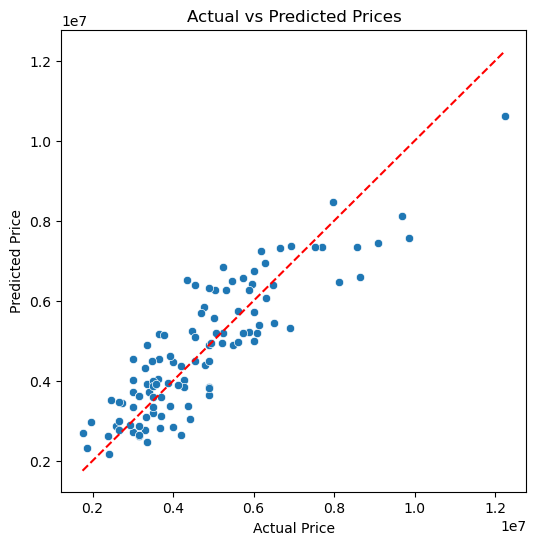

In [183]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

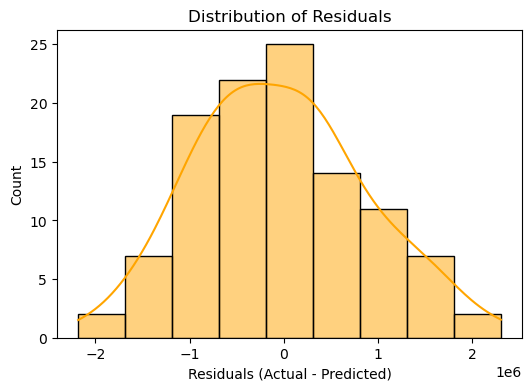

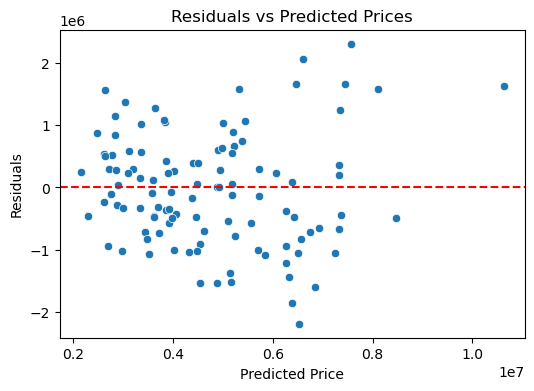

In [184]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


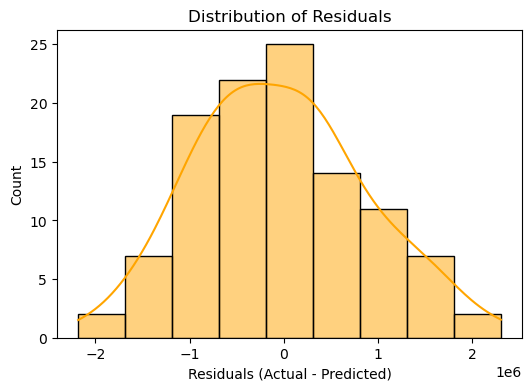

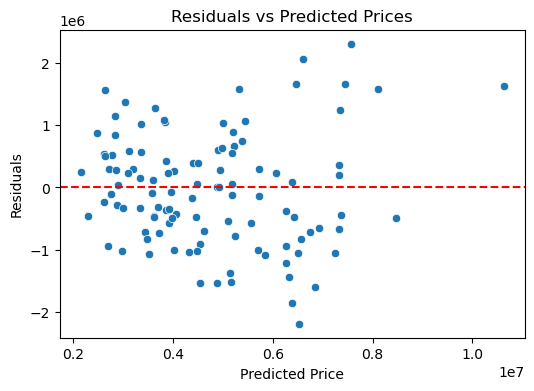

In [185]:
residuals = y_test - y_test_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.show()


# Conclusion
The linear regression model developed for predicting house prices performed well, with a test R² of 0.76, indicating that the model explains a substantial portion of the variation in house prices.

Key findings include:

Major drivers of house price are area, bathrooms, airconditioning, and stories.

Moderate contributors include prefarea, parking, and mainroad.

Features like bedrooms, guestroom, basement, and furnishingstatus have smaller but positive effects.

The model can effectively be used for property valuation and to guide decisions on house improvements that increase value. For further enhancement, applying regularization techniques or exploring non-linear relationships could improve predictive accuracy.

Overall: Linear regression provides a reliable, interpretable method to estimate house prices based on property features.